# FoodHub - Exploratory Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('..data/FoodHub_Order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [5]:
# write your code here
df.shape

(1898, 9)

#### Observations:
We have 1898 observations of 9 columns.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [6]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* The dataset has a total of 1898 rows and all 9 columns have 1898 observations indicating there are no missing values in this dataset
* Restaurant_name, cuisine_type and day_of_the_week read as 'object' data type but they should be categorical variables
* Would need rating to have numeric values, however has some rows populated with string

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df = df.astype({'restaurant_name':'category','cuisine_type':'category','day_of_the_week':'category'})
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
There are 5 numeric columns, 3 categorical columns and 1 object columns

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)


In [7]:
# write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* None of the numerical columns have outliers
* cost_of_the_order column is right skewed as 50th percentile is closer to 25th percentile and has a bigger difference with 75th percentile
* food_preparation_time	has uniform distribution
* delivery_time is slightly left skewed

### **Question 5:** How many orders are not rated? (0.5 mark)

In [8]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* In total 736 orders are not rated which is almost 40% of the data

### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### We would like to examine the distribution of 3 numeric continous variables, cost and time of preparation/delivery. We would also want to know the frequency of the 3 categorical variables in the dataset.

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [9]:
#Function for Univariate distribution 
def univariate_distribution(data,columnname,xaxis,kde=False,bins=15):
    #Set plot settings
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=(7,6),)  
    # Creating Boxplot
    sns.boxplot(data=data, x=columnname, ax=ax_box2, showmeans=True, color='hotpink')  
    # Creating histplot
    sns.histplot(data=data, x=columnname, kde=kde, ax=ax_hist2,bins=bins,color='Indigo') 
    # Show mean and median in histogram
    ax_hist2.axvline(data[columnname].mean(), color="green", linestyle="--")     
    ax_hist2.axvline(data[columnname].median(), color="red", linestyle="-")
    #Axis lables
    plt.xlabel(xaxis)   # label the x-axis
    plt.ylabel('Frequency')   # label the y-axis

### Observations on Cost of the order

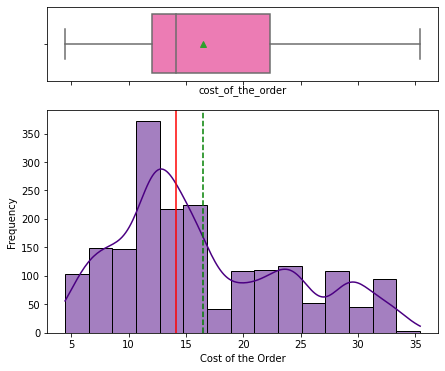

In [10]:
univariate_distribution(df, 'cost_of_the_order','Cost of the Order', kde=True,bins=15)

#### Observations:
* Distribution of cost of order is right skewed indicating cheaper foods are relatively popular
* There are no outliers in this data

### Observations on Food preparation time

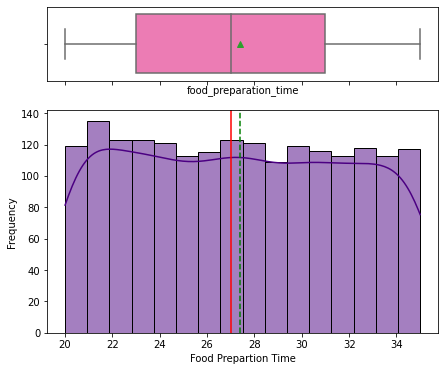

In [11]:
univariate_distribution(df, 'food_preparation_time','Food Prepartion Time', kde=True,bins=16)

#### Observations:
* Minimum food preparation time is 20 minutes and max is 35 minutes
* The data is uniformly distributed. So food preparation time can be anywhere between 20 to 35 minutes

### Observations on Delivery Time

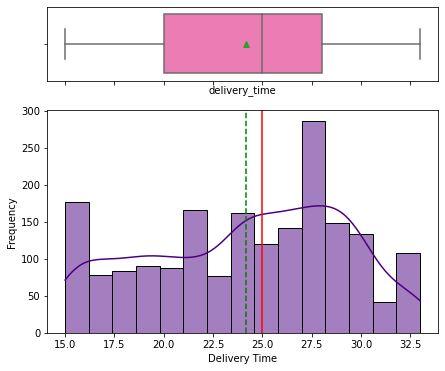

In [12]:
univariate_distribution(df, 'delivery_time','Delivery Time', kde=True,bins=15)

#### Observations:
* The delivery time is between 15 minutes to 35 minutes
* The data is slightly left skewed
* On average it takes slightly less than 25 minutes to deliver food

### Categorical variable observations

### Observations on Day of the week

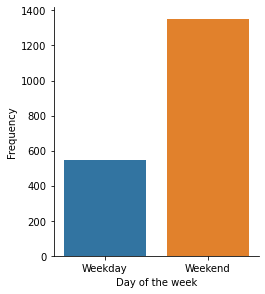

In [13]:
sns.catplot(x=df['day_of_the_week'],data=df,kind="count", height=4, aspect=.9)
plt.xlabel('Day of the week')
plt.ylabel('Frequency');

#### Observations:
* There are more orders placed during the weekend. In fact number of order more than doubles on the two days of weekend compared to 5 weekdays

### Observations on Rating

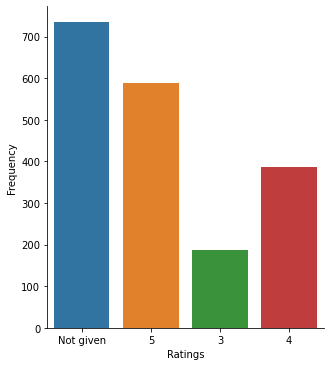

In [14]:
sns.catplot(x=df['rating'],data=df,kind="count", height=5, aspect=.9)
plt.xlabel('Ratings')
plt.ylabel('Frequency');

#### Observations:
* More orders are either given high rating or no rating at all
* For orders that has that has been rated, there are more ratings of 5 than 3 and 4
* No order has less than 3 ratings

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [10]:
# write the code here
df['restaurant_name'].value_counts().sort_values(ascending = False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Highest number of orders were received by the below 5 restaurants:

hake Shack                 
The Meatball Shop            
Blue Ribbon Sushi           
Blue Ribbon Fried Chicken    
Parm                          

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [11]:
# write the code here
df['cuisine_type'][df['day_of_the_week']=='Weekend'].value_counts().sort_values(ascending = False).head(5)

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
* Based on the sorted number of orders per cuisine for weekend, American is the most popular cuisine on weekends.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [12]:
# write the code here
df[df['cost_of_the_order']>20].count()

order_id                 555
customer_id              555
restaurant_name          555
cuisine_type             555
cost_of_the_order        555
day_of_the_week          555
rating                   555
food_preparation_time    555
delivery_time            555
dtype: int64

#### Observations:
There are in total 555 orders with cost above 20 dollars

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [13]:
# write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* Mean delivery time based on this datset is 24 minutes

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [14]:
df[df['cost_of_the_order'] == df['cost_of_the_order'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
* Customer ID: 62359 
* Customer spent 35.41 dollar to order Mediterranean food cuisine Pylos on a weekday
* It took 21 minutes to prepare the food and 29 minutes to deliver it. Customer gave it a ratings of 4

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

#### We will start with exploring the correlation between all the variables in the dataset to gain insight into the interaction between all the columns. A heatmap will help us quickly identify any strong relationship exists

### Correlation

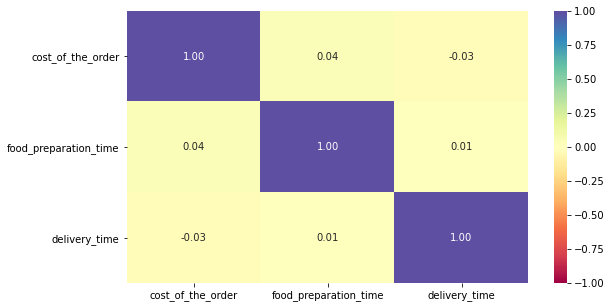

In [15]:
#First let's check if any correlation exists between provided numerical data
numeric_variables = df[['cost_of_the_order','food_preparation_time','delivery_time']]
correlation = numeric_variables.corr()
plt.figure(figsize=(9, 5))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
* The heatmap generated above does not give us much overall insight
* We do see slight positive correlation between cost of the order and food preparation time
* Also we see slight negative correlation between the delivery time and cost of the order

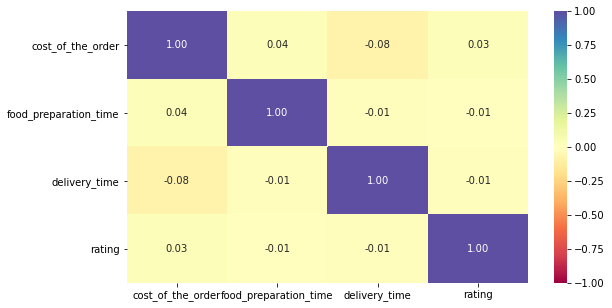

In [16]:
#We will explore if the rating has any strong correlation with any of the vriables.
#First step would be to drop all non rated orders and convert ratings to numerical value
ratings_data = df[df['rating'] != 'Not given']
ratings_data = ratings_data.astype({'rating':'int64'})
ratings_data = ratings_data[['cost_of_the_order','food_preparation_time','delivery_time','rating']]
rating_correlation = ratings_data.corr()

plt.figure(figsize=(9, 5))
sns.heatmap(rating_correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
* There is a slight negative correlation between rating and delivery time. Orders are rated lower if the delivery time is high
* The correlation between cost of order and rating is positive. More expensive orders are rated higher
* Analysis of rated only vs all data doesn't drastically change the correlation between vraiables

<Figure size 648x360 with 0 Axes>

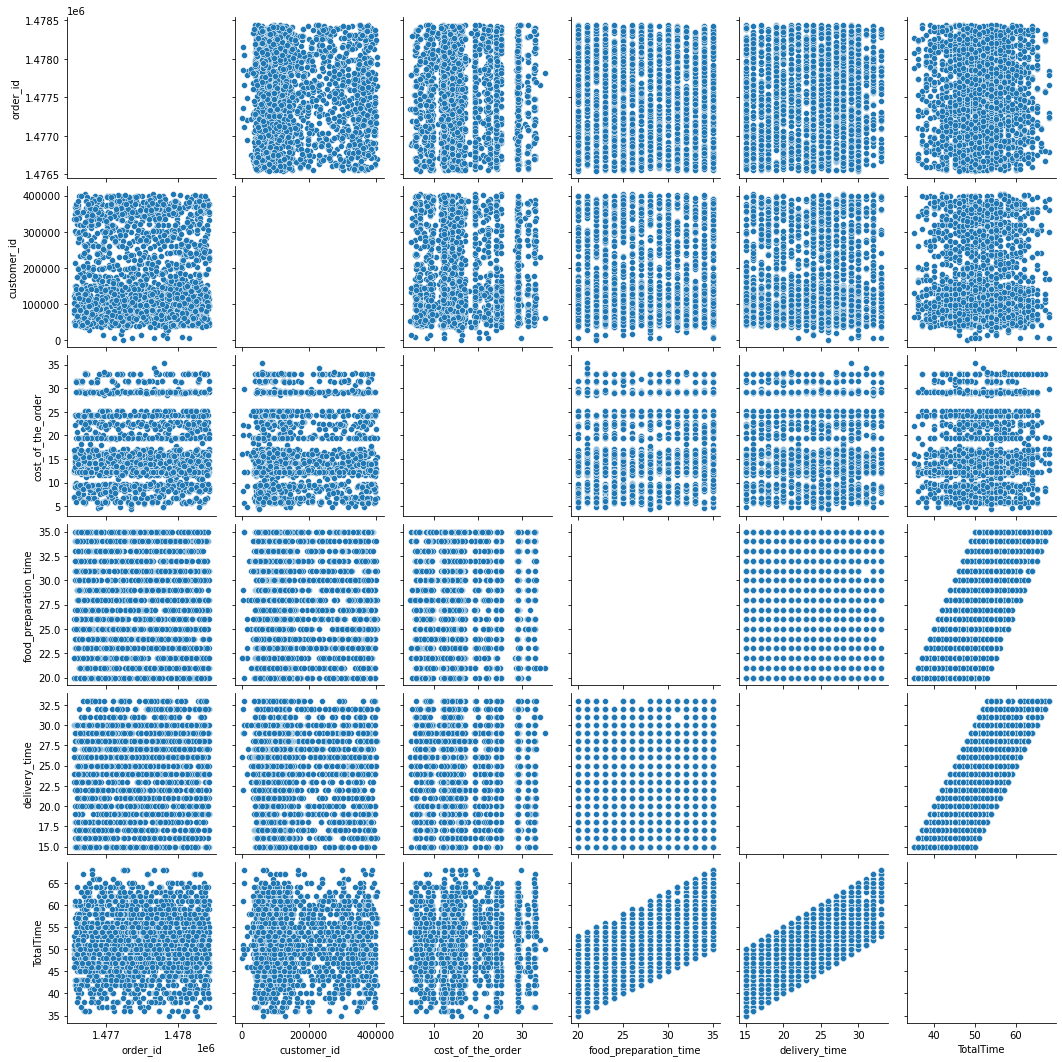

In [97]:
plt.figure(figsize=(9, 5))
sns.pairplot(data=df, diag_kind="box")
plt.show()

#### Observations:
* Pairplot in this case doesn't any additional insight

#### Ratings vs Cost of the order

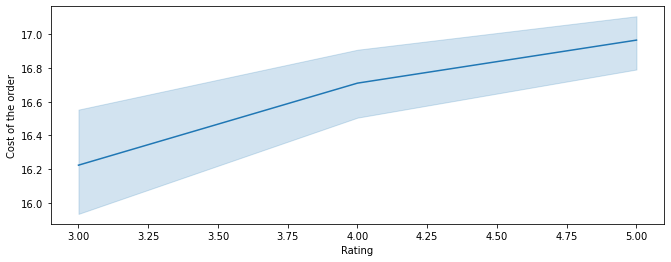

In [114]:
plt.figure(figsize=(11,4))
sns.lineplot(x='rating', y='cost_of_the_order', ci=39, data=ratings_data) #,hue='day_of_the_week',estimator=None)
plt.ylabel('Cost of the order')
plt.xlabel('Rating')
plt.show()

#### Observations:
* From the above visualization we see, ratings clearly goes up with cost of the food

#### Ratings and total time on weekday vs weekend

<Figure size 936x504 with 0 Axes>

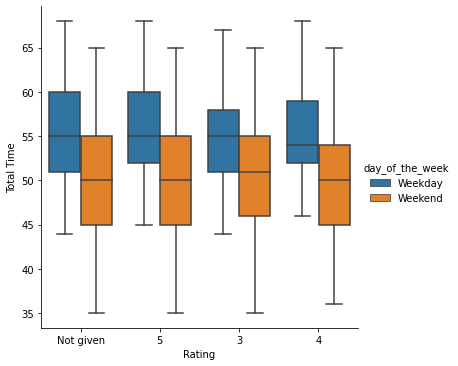

In [119]:
plt.figure(figsize=(13,7))
total_time = df
total_time['TotalTime'] = total_time['food_preparation_time'] + total_time['delivery_time']
sns.catplot(x='rating', y='TotalTime', kind='box',hue='day_of_the_week', data=total_time)
plt.ylabel('Total Time')
plt.xlabel('Rating')
plt.show()

#### Observations:
* From the above visualization we see, the total time to deliver is higher on weekdays compared to weekend
* Ratings does not seem to vary by the day of the week

#### Cost of the order vs day of the week

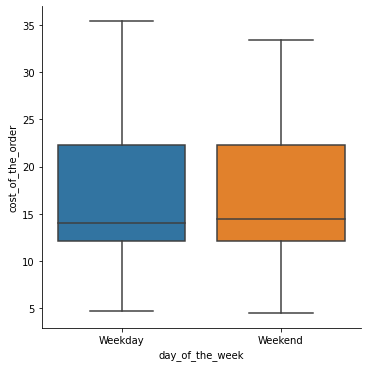

In [109]:
sns.catplot(x="day_of_the_week", y="cost_of_the_order", kind="box", data=df);

#### Observations:
* Maximum cost of the order is higher on weekday. However there is little different between the average cost of weekend and weekdays

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [138]:
# write the code here

#Drop all the records without ratings
ratings_calc = df[df['rating'] != 'Not given']
#Convert ratings to int type so that we can run our calculation
ratings_calc = ratings_calc.astype({'rating':'int64'})
#Find the average ratings and total rating counts per restaurant
AverageRating = ratings_calc.groupby(['restaurant_name'])['rating'].mean()
RatingCount = ratings_calc.groupby(['restaurant_name'])['rating'].count()
#Create a new data frame with rating information
RatingList = pd.concat([AverageRating.rename('MeanRating'),RatingCount.rename('RatingCount')],axis=1)
RatingList = RatingList[RatingList['MeanRating'].notna()]
#Select only the restaurants that fullfill the conditions
RatingList = RatingList[(RatingList['MeanRating'] > 4) & (RatingList['RatingCount'] > 50)]
print(RatingList)

                           MeanRating  RatingCount
restaurant_name                                   
Blue Ribbon Fried Chicken    4.328125           64
Blue Ribbon Sushi            4.219178           73
Shake Shack                  4.278195          133
The Meatball Shop            4.511905           84


#### Observations:
* There are 4 restaurants in total that full fill this condition, These restaurants are listed below:
  * Blue Ribbon Fried Chicken    
  * Blue Ribbon Sushi             
  * Shake Shack                  
  * The Meatball Shop  

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [139]:
# write the code here
cost_calc = df
#Add column where that holds the revenue generated for each order calculated using lambda function
cost_calc['revenue'] = cost_calc['cost_of_the_order'].apply(lambda x: x*.25 if x>20 else (0 if x<=5 else x*.15))
cost_calc['revenue'].sum()

6166.303

#### Observations:
* Net revenue generated by all the orders in the dataset is 6166.303

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [140]:
# write the code here
time_calc = df
time_calc['TotalTime'] = time_calc['food_preparation_time'] + time_calc['delivery_time']
#Select only the rows with a total time greater than 60
Rows_oversixty = time_calc[time_calc['TotalTime']>60].index
Rows_total = time_calc.index
Percent = (len(Rows_oversixty)/len(Rows_total))*100
print(Percent)

10.537407797681771


#### Observations:
* 10.5% of order has a total delivery time (food preparation + actual delivery) over 60 minutes

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [142]:
# write the code here
#Find the maen values for all three variables by day of the week
food_prep_mean = time_calc.groupby(['day_of_the_week'])['food_preparation_time'].mean()
only_delivery_mean = time_calc.groupby(['day_of_the_week'])['delivery_time'].mean()
delivery_mean = time_calc.groupby(['day_of_the_week'])['TotalTime'].mean()
print('Mean Food Preparation Time:\n',food_prep_mean.to_string(header = False),'\n')
print('Mean Delivery Time:\n',only_delivery_mean.to_string(header = False),'\n')
print('Mean Total Delivery Time:\n',delivery_mean.to_string(header = False),'\n')

Mean Food Preparation Time:
 Weekday    27.212066
Weekend    27.436714 

Mean Delivery Time:
 Weekday    28.340037
Weekend    22.470022 

Mean Total Delivery Time:
 Weekday    55.552102
Weekend    49.906736 



#### Observations:
* Total delivery time on weekdays is longer compared to weekend
* The average food preparation time is same regardless of weekend or weekdays. However on average it takes longer to actually deliver food on weekdays

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights: 
* Orders with higher delivery time tend to have lower ratings
* More expensive orders tend to receive higher ratings
* More orders are place during weekend. Number of orders more than doubles on the two days of weekend compared to 5 weekdays
* Weekdays have higher delivery time compared to weekends
* Ratings are not affected by day of the week
* There is a significant number of orders with no ratings

#### Conclusion: 
We analyzed a dataset that has information regarding nearly 2K orders from Foodhub. 
The data shows us how it is important to have orders delivered in time to achieve higher customer satisfaction. Customer disapproval is visible in ratings for order with higher delivery time than usual. 

Also delivery seems to take longer during weekdays compare to weekend despite the fact that the number of orders more than double during weekend. 

Another interesting observation was that, though more customers tend to place order for less expensive food more frequently, more expensive orders end up getting higher ratings. Which would indicate the importance of quality of the food. However, we can't be too certain about this conclusion as more than 30% of the orders are missing ratings.

Though we are able to see some trends such as decrease in ratings for orders with higher delivery time, the dataset doesn't provide us with nearly enough information for us to draw any useful conclusion. 


#### Recommendation:  
Out of all the observations in this analysis, what stood out most was the need to maintain a reasonable delivery time. The company would need to come up with strategy to deal with longer delivery times over weekend which could potentially discourage customers to place orders over the weekdays. 

Another recommendation for the company would be to work towards collecting more data from placed orders to gain better insights into customer behavior/experience. A larger dataset would certainly leave less room for error and will bring in more clarity into data. In addition, company will have to come up with strategy to collect more ratings from customers which will provide better insight into customer expectations whether through incentive or otherwise. 

Also, additional information such as location data, customer demographic etc. would be very helpful to have to determine regional distribution and customer behavior. 


